<img src="./img/Cours_4.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/RD_0.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_3.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_4.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_5.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/CP_6.svg" alt="Drawing" style="width: 2000px;"/>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()


features_cols = ['UPPSPNU', 'UPPSPPU', 'UPPSPPR', 'UPPSPPE', 'UPPSPSS', 'PHQ9TT', 'CEVQOTT', 'CEVQOTP', 'CEVQOTS', \
                'DAST10TT', 'AUDITTT', 'STAIYTT', 'BGHTTA', 'BGHTTB', 'BGHTTC', 'BGHTTD', 'AGE', 'SES']
X = data.loc[:, features_cols]
scaler = StandardScaler()
X = scaler.fit_transform(X)

n_components = 18
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X)
principalDataframe = pd.DataFrame(data = principalComponents, columns = \
                                  ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', \
                                   'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])


#print('\nComposantes de la PCA : \n\n', pca.components_)
print('\nVariance expliquée par les composantes : \n\n', pca.explained_variance_)

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
pc_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', \
              'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18']
plt.bar(x= range(1,n_components+1), height=percent_variance, tick_label=pc_columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de sélection de données
from sklearn.feature_selection import VarianceThreshold

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Noms des colonnes correspondant aux caractéristiques et à la cible
features_cols = ['UPPSPNU', 'UPPSPPU', 'UPPSPPR', 'UPPSPPE', 'UPPSPSS', 'PHQ9TT', 'CEVQOTT', 'CEVQOTP', 'CEVQOTS', \
                'DAST10TT', 'AUDITTT', 'STAIYTT', 'BGHTTA', 'BGHTTB', 'BGHTTC', 'BGHTTD', 'AGE']
target_col = 'WHODASTTB'

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# On effectue la PCA
n_components = 17
pca = PCA(n_components=n_components)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = DecisionTreeClassifier()

# Définir les hyperparamètres
hyperparams = {'max_depth':[1, 2, 4, 8, 12, 16], 'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

X_train_final = X_train_PCA
X_test_final = X_test_PCA
#X_train_final = X_train
#X_test_final = X_test

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train_final, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train_final, y_train)

In [ ]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test_final)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)

<img src="./img/TS_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/TS_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/TS_3.svg" alt="Drawing" style="width: 2000px;"/>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()


features_cols = ['UPPSPNU', 'UPPSPPU', 'UPPSPPR', 'UPPSPPE', 'UPPSPSS', 'PHQ9TT', 'CEVQOTT', 'CEVQOTP', 'CEVQOTS', \
                'DAST10TT', 'AUDITTT', 'STAIYTT', 'BGHTTA', 'BGHTTB', 'BGHTTC', 'BGHTTD', 'AGE', 'SES']

X = data.loc[:, features_cols]
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_embedded = TSNE(n_components=2).fit_transform(X)

print(X_embedded.shape)

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1])

<img src="./img/R_0.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/KM_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/KM_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/DM_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/DM_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/DB_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/DB_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/DB_3.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/DB_4.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/MG_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/MG_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/MG_3.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/MG_4.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/RH_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/RH_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/RH_3.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/V_1.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/V_2.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/V_3.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/V_4.svg" alt="Drawing" style="width: 2000px;"/>

<img src="./img/V_5.svg" alt="Drawing" style="width: 2000px;"/>

# 2.7. ENSEMBLE JOUET (SKLEARN)

<img src="./img/Jouet.png" alt="Drawing" style="width: 2000px;"/>

# 2.8. BANQUE DE DONNÉES SIGNATURE (SIMULÉE)

# ***2.8.1. KMEANS***


Silhouette :  0.1572357826862681

ARI :  0.1263278515903249

Matrice de contingence : 
 [[48 24 93]
 [78 24 21]]


"\n# Graphiqe\ntrue_markers = ['o','x']\npred_colors = ['b','r']\n\nfig= plt.figure(figsize=(12,10))\nax = fig.add_subplot(111)\nfor i in range(X.shape[0]):\n    ax.scatter(X_final[i,0],X_final[i,1], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)\n\nlegend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),\n                   Patch(facecolor='r', edgecolor='r', label='Pred 1'),\n                   Line2D([0], [0], marker='o', color='k', label='True 2', markerfacecolor='k', markersize=10),\n                   Line2D([0], [0], marker='x', color='k', label='True 3', markerfacecolor='k', markersize=10)]\nax.legend(handles=legend_elements)\n"

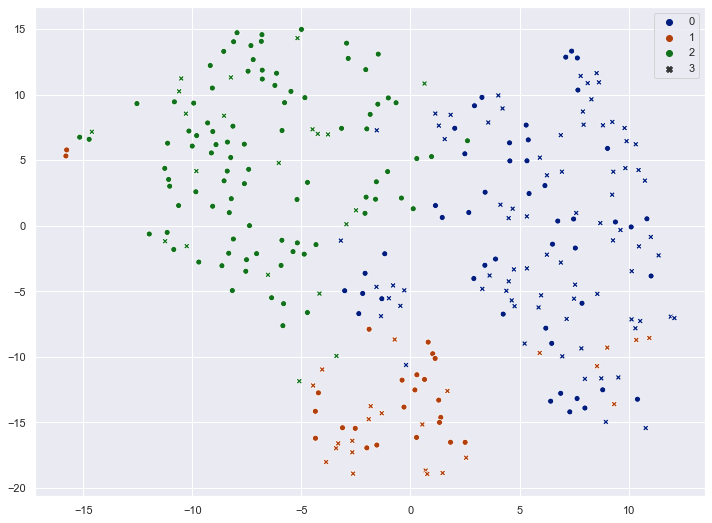

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.cluster import KMeans

# Importer des métriques permettant d'évaluer le algorithmes
from sklearn import metrics

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------


# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 4]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

features_cols = ['AGE', 'UPPSPPU', 'SES', 'BGHTTD', 'CEVQOTP', 'PHQ9TT']
#features_cols = ['AGE', 'UPPSPPU', 'SES']

X = data.loc[:, features_cols]
y = data['CIMDX'].astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

k = 3

X_PCA = PCA(n_components=k).fit_transform(X)
X_final = X_PCA
model = KMeans(n_clusters=k, random_state=0)
model.fit(X_final)

labels_pred = model.labels_
labels_true = np.array(y.astype(int))

if np.max(labels_pred) > 0:
    silhouette = metrics.silhouette_score(X, labels_pred)
ARI = metrics.adjusted_rand_score(labels_true, labels_pred)

print('\nSilhouette : ', silhouette)
print('\nARI : ', ARI)
print('\nMatrice de contingence : \n', metrics.cluster.contingency_matrix(labels_true, labels_pred))

# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X_final)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("dark", k)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, style=labels_true, legend='full', palette=palette)

"""
# Graphiqe
true_markers = ['o','x']
pred_colors = ['b','r']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for i in range(X.shape[0]):
    ax.scatter(X_final[i,0],X_final[i,1], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)

legend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),
                   Patch(facecolor='r', edgecolor='r', label='Pred 1'),
                   Line2D([0], [0], marker='o', color='k', label='True 2', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='x', color='k', label='True 3', markerfacecolor='k', markersize=10)]
ax.legend(handles=legend_elements)
"""

# 2.8. BANQUE DE DONNÉES SIGNATURE (SIMULÉE)

# ***2.8.2. MEAN SHIFT***

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.cluster import MeanShift, estimate_bandwidth

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

features_cols = ['AGE', 'BGHTTA', 'PSQ_SS']

X = data.loc[:, features_cols]
y = data['CIMDX']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 4]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

features_cols = ['AGE', 'UPPSPPU', 'SES', 'BGHTTD', 'CEVQOTP', 'PHQ9TT']
#features_cols = ['AGE', 'UPPSPPU', 'SES']

X = data.loc[:, features_cols]
y = data['CIMDX'].astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

X_PCA = PCA(n_components=2).fit_transform(X)

X_final = X_PCA
#X_final = X

bandwidth = estimate_bandwidth(X_final, quantile=0.3)

model = MeanShift(bandwidth=bandwidth, cluster_all=True)
model.fit(X_final)

labels_pred = (model.labels_).astype(int)
labels_true = np.array(y.astype(int))

if np.max(labels_pred) > 0:
    silhouette = metrics.silhouette_score(X, labels_pred)
ARI = metrics.adjusted_rand_score(labels_true, labels_pred)

print('\nSilhouette : ', silhouette)
print('\nARI : ', ARI)
print('\nMatrice de contingence : \n', metrics.cluster.contingency_matrix(labels_true, labels_pred))

# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X_final)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("dark", np.size(np.unique(labels_pred)))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, style=labels_true, legend='full', palette=palette)

"""
# Graphiqe
true_markers = ['o','x']
pred_colors = ['b','r']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for i in range(X.shape[0]):
    ax.scatter(X_final[i,0],X_final[i,1], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)

legend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),
                   Patch(facecolor='r', edgecolor='r', label='Pred 1'),
                   Line2D([0], [0], marker='o', color='k', label='True 2', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='x', color='k', label='True 3', markerfacecolor='k', markersize=10)]
ax.legend(handles=legend_elements)
"""

# 2.8. BANQUE DE DONNÉES SIGNATURE (SIMULÉE)

# ***2.8.3. DBSCAN***

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.mixture import GaussianMixture

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 4]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

features_cols = ['AGE', 'UPPSPPU', 'SES', 'BGHTTD', 'CEVQOTP', 'PHQ9TT']
#features_cols = ['AGE', 'UPPSPPU', 'SES']

X = data.loc[:, features_cols]
y = data['CIMDX'].astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

k = 3

X_PCA = PCA(n_components=2).fit_transform(X)

X_final = X_PCA
#X_final = X

model = GaussianMixture(n_components=k, max_iter=1000, init_params='kmeans')
model.fit(X_final)

labels_pred = model.predict(X_final)
labels_true = np.array(y.astype(int))

if np.max(labels_pred) > 0:
    silhouette = metrics.silhouette_score(X, labels_pred)
ARI = metrics.adjusted_rand_score(labels_true, labels_pred)

print('\nSilhouette : ', silhouette)
print('\nARI : ', ARI)
print('\nMatrice de contingence : \n', metrics.cluster.contingency_matrix(labels_true, labels_pred))

# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X_final)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("dark", np.size(np.unique(labels_pred)))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, style=labels_true, legend='full', palette=palette)


"""
# Graphiqe
true_markers = ['o','x']
pred_colors = ['b','r']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for i in range(X.shape[0]):
    ax.scatter(X_final[i,0],X_final[i,1], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)

legend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),
                   Patch(facecolor='r', edgecolor='r', label='Pred 1'),
                   Line2D([0], [0], marker='o', color='k', label='True 2', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='x', color='k', label='True 3', markerfacecolor='k', markersize=10)]
ax.legend(handles=legend_elements)
"""

# 2.8. BANQUE DE DONNÉES SIGNATURE (SIMULÉE)

# ***2.8.4. GAUSSIAN MIXTURE***

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.cluster import DBSCAN

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

from sklearn import metrics

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 4]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

features_cols = ['AGE', 'UPPSPPU', 'SES', 'BGHTTD', 'CEVQOTP', 'PHQ9TT']
#features_cols = ['AGE', 'UPPSPPU', 'SES']

X = data.loc[:, features_cols]
y = data['CIMDX'].astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

X_PCA = PCA(n_components=2).fit_transform(X)

X_final = X_PCA
#X_final = X

model = DBSCAN(eps=0.5, min_samples=5)
model.fit(X_final)

labels_pred = model.labels_
labels_true = np.array(y.astype(int))

if np.max(labels_pred) > 0:
    silhouette = metrics.silhouette_score(X_final, labels_pred)
ARI = metrics.adjusted_rand_score(labels_true, labels_pred)

print('\nSilhouette : ', silhouette)
print('\nARI : ', ARI)
print('\nMatrice de contingence : \n', metrics.cluster.contingency_matrix(labels_true, labels_pred))

# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X_final)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("dark", np.size(np.unique(labels_pred)))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, style=labels_true, legend='full', palette=palette)

"""
# Graphiqe
true_markers = ['o','x']
pred_colors = ['b','r']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for i in range(X.shape[0]):
    ax.scatter(X_final[i,0],X_final[i,1], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)

legend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),
                   Patch(facecolor='r', edgecolor='r', label='Pred 1'),
                   Line2D([0], [0], marker='o', color='k', label='True 2', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='x', color='k', label='True 3', markerfacecolor='k', markersize=10)]
ax.legend(handles=legend_elements)
"""

# 2.8. BANQUE DE DONNÉES SIGNATURE (SIMULÉE)

# ***2.8.5. AGGLOMERATIVE***

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

%matplotlib inline

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Importer une fonction de réduction de dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importer une fonction de regroupement
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Importer les métriques
from sklearn import metrics

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data[data.CIMDX != 1]
data = data[data.CIMDX != 4]
data = data[data.CIMDX != 5]
data = data[data.CIMDX != 6]
data = data.dropna()

features_cols = ['AGE', 'UPPSPPU', 'SES', 'BGHTTD', 'CEVQOTP', 'PHQ9TT']
#features_cols = ['AGE', 'UPPSPPU', 'SES']

X = data.loc[:, features_cols]
y = data['CIMDX'].astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

k = 2

X_PCA = PCA(n_components=2).fit_transform(X)

X_final = X_PCA
#X_final = X
model = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=k)
model.fit(X_final)

labels_pred = model.labels_
labels_true = np.array(y.astype(int))

if np.max(labels_pred) > 0:
    silhouette = metrics.silhouette_score(X_final, labels_pred)
ARI = metrics.adjusted_rand_score(labels_true, labels_pred)

print('\nSilhouette : ', silhouette)
print('\nARI : ', ARI)
print('\nMatrice de contingence : \n', metrics.cluster.contingency_matrix(labels_true, labels_pred))

# tSNE
X_embedded = TSNE(n_components=2).fit_transform(X_final)
sns.set(rc={'figure.figsize':(12,9)})
palette = sns.color_palette("dark", np.size(np.unique(labels_pred)))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels_pred, style=labels_true, legend='full', palette=palette)



# Graphiqe
true_markers = ['o','x']
pred_colors = ['b','r']

fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for i in range(X.shape[0]):
    ax.scatter(X_final[i,0],X_final[i,1], marker=true_markers[labels_true[i]-2], c=pred_colors[labels_pred[i]], s=100)

legend_elements = [Patch(facecolor='b', edgecolor='b', label='Pred 0'),
                   Patch(facecolor='r', edgecolor='r', label='Pred 1'),
                   Line2D([0], [0], marker='o', color='k', label='True 2', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='x', color='k', label='True 3', markerfacecolor='k', markersize=10)]
ax.legend(handles=legend_elements)


<img src="./img/ME_1.svg" alt="Drawing" style="width: 2000px;"/>